In [1]:
#getting and working with data
import pandas as pd
import numpy as np
import re
import os

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import KFold, StratifiedKFold, GroupKFold, train_test_split, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV

from sklearn.cluster import KMeans
from sklearn.metrics.cluster import silhouette_score

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC 
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, classification_report

#visualizing results
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#import yellowbrick as yb

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import warnings; warnings.simplefilter('ignore')
np.set_printoptions(suppress=True)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.CSRRD7HKRKC3T3YXA7VY7TAZGLSWDKW6.gfortran-win_amd64.dll
C:\ProgramData\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
path_traintest = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Escalation/Ferguson/IntA_dataset_TJO_V3.csv'

In [3]:
data = pd.read_csv(path_traintest)
data = pd.DataFrame(data = data)
print(data.shape)
print(data.Severity.value_counts())
data = data[data['Severity'] != 'moderate']
print(data.shape)
print(data.Severity.value_counts())
data.head()

(101, 38)
low     52
high    49
Name: Severity, dtype: int64
(101, 38)
low     52
high    49
Name: Severity, dtype: int64


,Subject,Severity,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5
0,23,high,3.219399,14,7,16,40,55,8,5,3,6,13,3,3,5,9,12,90,43,67,84,70,18.36,8.34,1.98,28.45,48.63,81.633333,90.186667,110.840000,92.971111,53.913333,21.386364,58.887500,30.935455,12.659032,9.728140
1,24,high,2.736850,9,5,17,51,7,3,4,0,7,8,3,3,7,8,1,23,17,34,69,43,18.57,15.89,997.07,88.06,3.06,83.186667,64.023333,136.605714,114.841250,3.060000,10.633333,1.695000,5.106000,13.922051,14.105000
2,25,high,11.853283,6,9,25,38,39,3,4,3,9,10,3,6,12,12,12,37,44,118,133,199,25.99,5.72,0.86,6.36,23.76,116.250000,112.315000,59.905000,101.097692,76.659167,31.653333,14.703333,8.092308,3.311923,3.827037
3,29,high,5.758969,4,7,30,33,44,3,1,7,6,17,2,4,8,11,8,39,11,87,103,32,22.73,77.30,7.38,6.30,80.97,18.880000,107.487500,67.045000,67.880000,111.002500,113.945000,6.550000,3.270455,9.454091,23.423611
4,33,low,-1.756420,2,4,9,15,20,2,2,4,4,4,1,3,4,8,10,9,14,6,14,12,13.40,20.73,11.39,22.95,4.00,13.400000,164.970000,66.860000,62.742500,10.750000,84.370000,10.540000,39.708000,37.553333,22.594000


In [4]:
data['class'] = data['Severity'].replace(regex={r'low': 0, 'high': 1})
data.head()

,Subject,Severity,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class
0,23,high,3.219399,14,7,16,40,55,8,5,3,6,13,3,3,5,9,12,90,43,67,84,70,18.36,8.34,1.98,28.45,48.63,81.633333,90.186667,110.840000,92.971111,53.913333,21.386364,58.887500,30.935455,12.659032,9.728140,1
1,24,high,2.736850,9,5,17,51,7,3,4,0,7,8,3,3,7,8,1,23,17,34,69,43,18.57,15.89,997.07,88.06,3.06,83.186667,64.023333,136.605714,114.841250,3.060000,10.633333,1.695000,5.106000,13.922051,14.105000,1
2,25,high,11.853283,6,9,25,38,39,3,4,3,9,10,3,6,12,12,12,37,44,118,133,199,25.99,5.72,0.86,6.36,23.76,116.250000,112.315000,59.905000,101.097692,76.659167,31.653333,14.703333,8.092308,3.311923,3.827037,1
3,29,high,5.758969,4,7,30,33,44,3,1,7,6,17,2,4,8,11,8,39,11,87,103,32,22.73,77.30,7.38,6.30,80.97,18.880000,107.487500,67.045000,67.880000,111.002500,113.945000,6.550000,3.270455,9.454091,23.423611,1
4,33,low,-1.756420,2,4,9,15,20,2,2,4,4,4,1,3,4,8,10,9,14,6,14,12,13.40,20.73,11.39,22.95,4.00,13.400000,164.970000,66.860000,62.742500,10.750000,84.370000,10.540000,39.708000,37.553333,22.594000,0


In [5]:
data.isna().sum()

Subject           0
Severity          0
Z-score           0
infusions_day1    0
infusions_day2    0
infusions_day3    0
infusions_day4    0
infusions_day5    0
loading_day1      0
loading_day2      0
loading_day3      0
loading_day4      0
loading_day5      0
taking_day1       0
taking_day2       0
taking_day3       0
taking_day4       0
taking_day5       0
seeking_day1      0
seeking_day2      0
seeking_day3      0
seeking_day4      0
seeking_day5      0
first_day1        0
first_day2        0
first_day3        0
first_day4        0
first_day5        0
latency_day1      0
latency_day2      0
latency_day3      0
latency_day4      0
latency_day5      0
interval_day1     0
interval_day2     0
interval_day3     0
interval_day4     0
interval_day5     0
class             0
dtype: int64

In [6]:
data['infusions_ave'] = data[['infusions_day1', 'infusions_day2', 'infusions_day3', 'infusions_day4', 'infusions_day5']].mean(axis = 1)

data['loading_ave'] = data[['loading_day1', 'loading_day2', 'loading_day3', 'loading_day4', 'loading_day5']].mean(axis = 1)

data['taking_ave'] = data[['taking_day1', 'taking_day2', 'taking_day3', 'taking_day4', 'taking_day5']].mean(axis = 1)

data['seeking_ave'] = data[['seeking_day1', 'seeking_day2', 'seeking_day3', 'seeking_day4', 'seeking_day5']].mean(axis = 1)

data['first_ave'] = data[['first_day1', 'first_day2', 'first_day3', 'first_day4', 'first_day5']].mean(axis = 1)

data['latency_ave'] = data[['latency_day1', 'latency_day2', 'latency_day3', 'latency_day4', 'latency_day5']].mean(axis = 1)

data['interval_ave'] = data[['interval_day1', 'interval_day2', 'interval_day3', 'interval_day4', 'interval_day5']].mean(axis = 1)

data.head()

,Subject,Severity,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class,infusions_ave,loading_ave,taking_ave,seeking_ave,first_ave,latency_ave,interval_ave
0,23,high,3.219399,14,7,16,40,55,8,5,3,6,13,3,3,5,9,12,90,43,67,84,70,18.36,8.34,1.98,28.45,48.63,81.633333,90.186667,110.840000,92.971111,53.913333,21.386364,58.887500,30.935455,12.659032,9.728140,1,26.4,7.0,6.4,70.8,21.152,85.908889,26.719298
1,24,high,2.736850,9,5,17,51,7,3,4,0,7,8,3,3,7,8,1,23,17,34,69,43,18.57,15.89,997.07,88.06,3.06,83.186667,64.023333,136.605714,114.841250,3.060000,10.633333,1.695000,5.106000,13.922051,14.105000,1,17.8,4.4,4.4,37.2,224.530,80.343393,9.092277
2,25,high,11.853283,6,9,25,38,39,3,4,3,9,10,3,6,12,12,12,37,44,118,133,199,25.99,5.72,0.86,6.36,23.76,116.250000,112.315000,59.905000,101.097692,76.659167,31.653333,14.703333,8.092308,3.311923,3.827037,1,23.4,5.8,9.0,106.2,12.538,93.245372,12.317587
3,29,high,5.758969,4,7,30,33,44,3,1,7,6,17,2,4,8,11,8,39,11,87,103,32,22.73,77.30,7.38,6.30,80.97,18.880000,107.487500,67.045000,67.880000,111.002500,113.945000,6.550000,3.270455,9.454091,23.423611,1,23.6,6.8,6.6,54.4,38.936,74.459000,31.328631
4,33,low,-1.756420,2,4,9,15,20,2,2,4,4,4,1,3,4,8,10,9,14,6,14,12,13.40,20.73,11.39,22.95,4.00,13.400000,164.970000,66.860000,62.742500,10.750000,84.370000,10.540000,39.708000,37.553333,22.594000,0,10.0,3.2,5.2,11.0,14.494,63.744500,38.953067


In [7]:
corr = data.corr()
#fig, ax = plt.subplots(figsize=(20, 20))
#sns.heatmap(corr, annot=True)
corr['class'].sort_values()

latency_ave      -0.498068
interval_ave     -0.485998
latency_day5     -0.449397
first_ave        -0.444602
interval_day3    -0.417603
first_day3       -0.395449
interval_day5    -0.394069
first_day5       -0.377859
latency_day4     -0.363398
latency_day2     -0.350923
interval_day2    -0.350530
first_day2       -0.318541
first_day4       -0.310163
interval_day4    -0.291543
latency_day3     -0.264784
interval_day1    -0.261194
latency_day1     -0.188878
first_day1       -0.184799
Subject          -0.080034
seeking_day1      0.192482
loading_day2      0.216224
loading_day1      0.243415
loading_day3      0.283854
taking_day1       0.316958
infusions_day1    0.323079
seeking_day2      0.330192
taking_day2       0.341583
infusions_day2    0.393557
taking_day3       0.438572
loading_day4      0.445469
taking_day4       0.481479
loading_day5      0.504629
seeking_day4      0.512044
loading_ave       0.532135
seeking_day3      0.539559
infusions_day3    0.540328
taking_ave        0.592793
s

In [8]:
data.groupby('Severity').mean()

,Subject,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class,infusions_ave,loading_ave,taking_ave,seeking_ave,first_ave,latency_ave,interval_ave
Severity,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
high,135.693878,4.335053,6.632653,11.040816,20.183673,23.938776,27.673469,2.469388,3.326531,4.714286,5.346939,6.367347,3.224490,4.816327,7.183673,8.591837,9.653061,22.877551,37.530612,57.489796,74.816327,73.755102,548.914490,283.377755,86.330408,116.974490,32.609796,118.338578,100.872687,95.321659,71.448057,55.803430,68.463595,30.140920,25.843708,31.598535,14.384587,1.0,17.893878,4.444898,6.693878,53.293878,213.641388,88.356882,34.086269
low,145.980769,-3.783469,3.807692,5.173077,6.269231,6.980769,9.192308,1.538462,2.269231,3.000000,2.673077,2.942308,1.942308,2.653846,3.096154,3.538462,3.865385,16.634615,12.115385,10.269231,12.788462,11.615385,1026.588654,1073.129231,974.672692,724.654231,758.588269,152.246696,158.240809,135.530695,124.567731,119.086192,131.270774,105.369649,112.501826,90.531731,84.476611,0.0,6.284615,2.484615,3.019231,12.684615,911.526615,137.934425,104.830118


In [9]:
#create feature sets
features_full = ['infusions_day1',
       'infusions_day2', 'infusions_day3', 'infusions_day4',
       'infusions_day5', 'loading_day1', 'loading_day2', 'loading_day3',
       'loading_day4', 'loading_day5', 'taking_day1', 'taking_day2',
       'taking_day3', 'taking_day4', 'taking_day5', 'seeking_day1',
       'seeking_day2', 'seeking_day3', 'seeking_day4', 'seeking_day5',
       'first_day1', 'first_day2', 'first_day3', 'first_day4',
       'first_day5', 'latency_day1', 'latency_day2', 'latency_day3',
       'latency_day4', 'latency_day5', 'interval_day1', 'interval_day2',
       'interval_day3', 'interval_day4', 'interval_day5']

features_ave = ['infusions_ave',
       'loading_ave', 'taking_ave', 'seeking_ave', 'first_ave',
       'latency_ave', 'interval_ave']

features_day1 = ['infusions_day1',
       'loading_day1', 'taking_day1', 'seeking_day1',
       'first_day1', 'latency_day1', 'interval_day1']

features_day5 = ['infusions_day5',
       'loading_day5', 'taking_day5', 'seeking_day5',
       'first_day5', 'latency_day5', 'interval_day5']

In [10]:
#split data
train, test = train_test_split(data, test_size = .3, random_state=1, stratify = data['class'])

Y_train_class = train['class']
Y_test_class = test['class']


X_train_full = train[features_full]
X_train_ave = train[features_ave]
X_train_day1 = train[features_day1]
X_train_day5 = train[features_day5]

X_test_full = test[features_full]
X_test_ave = test[features_ave]
X_test_day1 = test[features_day1]
X_test_day5 = test[features_day5]


In [11]:
#scale data algo
scaler = StandardScaler()

#k fold algo
strat_k_fold = StratifiedKFold(n_splits=10)

#classifier algos
dm_cv = DummyClassifier(strategy='stratified', random_state=39)
lr_cv = LogisticRegression(random_state=39, class_weight='balanced')
rf_cv = RandomForestClassifier(random_state=39, class_weight='balanced')
svm_cv = SVC(kernel='linear', probability=True, class_weight='balanced') 
knn_cv = KNeighborsClassifier()
gb_cv = GradientBoostingClassifier(random_state=39)
ab_cv = AdaBoostClassifier(random_state=39)

#dic with classifier and feature importance attribute name
models_dic = {'dm_cv': (dm_cv, 'none'), 
              'lr_cv': (lr_cv, 'coef'), 
              'rf_cv': (rf_cv, 'feature_importance'), 
              'svm_cv':(svm_cv, 'coef'), 
              'knn_cv': (knn_cv, 'none'), 
              'gb_cv': (gb_cv, 'feature_importance'), 
              'ab_cv': (ab_cv, 'feature_importance')}


In [12]:
def feature_importance(X, y, model_instance, feature_names, fi_name):
    #takes in features (X) and classess (y), model, column names for features in X, and name of attribute for feature importance
    #returns dictionary of feature names and coef/feature importance values
    
    feature_importance_dic = {}
    
    model_instance.fit(X, y)
    
    if fi_name == 'coef':
        coef = model_instance.coef_[0]
        feature_importance_dic = dict(zip(feature_names, coef))
    if fi_name == 'feature_importance':
        coef = model_instance.feature_importances_
        feature_importance_dic = dict(zip(feature_names, coef))
    if fi_name == 'none':
        coef = np.zeros(len(feature_names))
        feature_importance_dic = dict(zip(feature_names, coef))
    
    return feature_importance_dic

In [13]:
def classification_pipeline(X, y, cv_instance, model_instance, feature_names, fi_name):
    
    #scale data
    data_scaled = scaler.fit_transform(X)
    
    #generate cross-val sets
    cv = list(cv_instance.split(data_scaled, y))
    
    #predict class and predict probability 
    y_pred = cross_val_predict(model_instance, data_scaled, y, cv=cv, method='predict')
    y_pred_prob = cross_val_predict(model_instance, data_scaled, y, cv=cv, method='predict_proba')
    
    #generate confusion matrix
    conf_mat = confusion_matrix(y, y_pred)
    print('Confusion matrix:', conf_mat)
    
    #generate ROC_AUC
    ROC_AUC = metrics.roc_auc_score(y, y_pred_prob[:,1])
    print("ROC_AUC: ", ROC_AUC)
    
    # generate additional metrics
    recall = metrics.recall_score(y,y_pred)
    precision = metrics.precision_score(y,y_pred)
    accuracy = metrics.accuracy_score(y,y_pred)
    F1 = metrics.f1_score(y,y_pred)
    print("Sensitivity/Recall (TPR): ",recall)
    print("Precision (PPV): ", precision)
    print("Accuracy: ", accuracy)
    print("F1:", F1)
    
    #determine feature importance
    feature_dic = feature_importance(data_scaled, y, model_instance, feature_names, fi_name)
    
    #create dic
    data_dic = {}
    data_dic['y_pred'] = y_pred
    data_dic['y_pred_prob'] = y_pred_prob
    data_dic['conf_mat'] = conf_mat
    data_dic['ROC_AUC'] = ROC_AUC
    data_dic['recall'] = recall
    data_dic['precision'] = precision
    data_dic['accuracy'] = accuracy
    data_dic['F1'] = F1
    
    data_dic = {**data_dic, **feature_dic}
    
    return data_dic

In [14]:
feature_set = 'full'
feature_names = features_full

data_full_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_full_features[name + '_' + feature_set] = classification_pipeline(X_train_full, Y_train_class, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with full features:
Confusion matrix: [[12 24]
 [ 8 26]]
ROC_AUC:  0.5490196078431373
Sensitivity/Recall (TPR):  0.7647058823529411
Precision (PPV):  0.52
Accuracy:  0.5428571428571428
F1: 0.6190476190476191


lr_cv model with full features:
Confusion matrix: [[26 10]
 [11 23]]
ROC_AUC:  0.8284313725490196
Sensitivity/Recall (TPR):  0.6764705882352942
Precision (PPV):  0.696969696969697
Accuracy:  0.7
F1: 0.6865671641791046


rf_cv model with full features:
Confusion matrix: [[30  6]
 [ 8 26]]
ROC_AUC:  0.8316993464052288
Sensitivity/Recall (TPR):  0.7647058823529411
Precision (PPV):  0.8125
Accuracy:  0.8
F1: 0.787878787878788


svm_cv model with full features:
Confusion matrix: [[25 11]
 [12 22]]
ROC_AUC:  0.7851307189542482
Sensitivity/Recall (TPR):  0.6470588235294118
Precision (PPV):  0.6666666666666666
Accuracy:  0.6714285714285714
F1: 0.6567164179104478


knn_cv model with full features:
Confusion matrix: [[31  5]
 [ 6 28]]
ROC_AUC:  0.8766339869281046
Sensitivity/Re

In [15]:
feature_set = 'ave'
feature_names = features_ave

data_ave_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_ave_features[name + '_' + feature_set] = classification_pipeline(X_train_ave, Y_train_class, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with ave features:
Confusion matrix: [[12 24]
 [ 8 26]]
ROC_AUC:  0.5490196078431373
Sensitivity/Recall (TPR):  0.7647058823529411
Precision (PPV):  0.52
Accuracy:  0.5428571428571428
F1: 0.6190476190476191


lr_cv model with ave features:
Confusion matrix: [[32  4]
 [ 8 26]]
ROC_AUC:  0.8880718954248366
Sensitivity/Recall (TPR):  0.7647058823529411
Precision (PPV):  0.8666666666666667
Accuracy:  0.8285714285714286
F1: 0.8125


rf_cv model with ave features:
Confusion matrix: [[31  5]
 [ 8 26]]
ROC_AUC:  0.8443627450980391
Sensitivity/Recall (TPR):  0.7647058823529411
Precision (PPV):  0.8387096774193549
Accuracy:  0.8142857142857143
F1: 0.7999999999999999


svm_cv model with ave features:
Confusion matrix: [[31  5]
 [ 8 26]]
ROC_AUC:  0.8831699346405228
Sensitivity/Recall (TPR):  0.7647058823529411
Precision (PPV):  0.8387096774193549
Accuracy:  0.8142857142857143
F1: 0.7999999999999999


knn_cv model with ave features:
Confusion matrix: [[29  7]
 [ 9 25]]
ROC_AUC:  0.8598

In [16]:
feature_set = 'day1'
feature_names = features_day1

data_day1_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_day1_features[name + '_' + feature_set] = classification_pipeline(X_train_day1, Y_train_class, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with day1 features:
Confusion matrix: [[12 24]
 [ 8 26]]
ROC_AUC:  0.5490196078431373
Sensitivity/Recall (TPR):  0.7647058823529411
Precision (PPV):  0.52
Accuracy:  0.5428571428571428
F1: 0.6190476190476191


lr_cv model with day1 features:
Confusion matrix: [[24 12]
 [15 19]]
ROC_AUC:  0.5906862745098039
Sensitivity/Recall (TPR):  0.5588235294117647
Precision (PPV):  0.6129032258064516
Accuracy:  0.6142857142857143
F1: 0.5846153846153845


rf_cv model with day1 features:
Confusion matrix: [[15 21]
 [18 16]]
ROC_AUC:  0.49836601307189543
Sensitivity/Recall (TPR):  0.47058823529411764
Precision (PPV):  0.43243243243243246
Accuracy:  0.44285714285714284
F1: 0.4507042253521127


svm_cv model with day1 features:
Confusion matrix: [[23 13]
 [17 17]]
ROC_AUC:  0.485702614379085
Sensitivity/Recall (TPR):  0.5
Precision (PPV):  0.5666666666666667
Accuracy:  0.5714285714285714
F1: 0.53125


knn_cv model with day1 features:
Confusion matrix: [[20 16]
 [19 15]]
ROC_AUC:  0.5314542483

In [17]:
feature_set = 'day5'
feature_names = features_day5

data_day5_features = {}

for name, model in models_dic.items():
    print(f'{name} model with {feature_set} features:')
    data_day5_features[name + '_' + feature_set] = classification_pipeline(X_train_day5, Y_train_class, strat_k_fold, model[0], feature_names, model[1])
    print('\n')

dm_cv model with day5 features:
Confusion matrix: [[12 24]
 [ 8 26]]
ROC_AUC:  0.5490196078431373
Sensitivity/Recall (TPR):  0.7647058823529411
Precision (PPV):  0.52
Accuracy:  0.5428571428571428
F1: 0.6190476190476191


lr_cv model with day5 features:
Confusion matrix: [[31  5]
 [ 7 27]]
ROC_AUC:  0.9076797385620915
Sensitivity/Recall (TPR):  0.7941176470588235
Precision (PPV):  0.84375
Accuracy:  0.8285714285714286
F1: 0.8181818181818182


rf_cv model with day5 features:
Confusion matrix: [[29  7]
 [10 24]]
ROC_AUC:  0.8447712418300655
Sensitivity/Recall (TPR):  0.7058823529411765
Precision (PPV):  0.7741935483870968
Accuracy:  0.7571428571428571
F1: 0.7384615384615385


svm_cv model with day5 features:
Confusion matrix: [[31  5]
 [ 8 26]]
ROC_AUC:  0.8839869281045751
Sensitivity/Recall (TPR):  0.7647058823529411
Precision (PPV):  0.8387096774193549
Accuracy:  0.8142857142857143
F1: 0.7999999999999999


knn_cv model with day5 features:
Confusion matrix: [[29  7]
 [ 8 26]]
ROC_AUC:  

In [20]:
#put dics in pandas df 
final_dic = {**data_full_features, **data_ave_features, **data_day1_features, **data_day5_features}
data_pandas = pd.DataFrame.from_dict(data = final_dic, orient='index')
data_pandas.sort_values('precision', ascending=False).head()

,y_pred,y_pred_prob,conf_mat,ROC_AUC,recall,precision,accuracy,F1,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,infusions_ave,loading_ave,taking_ave,seeking_ave,first_ave,latency_ave,interval_ave
lr_cv_ave,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...","[[0.9307391107935984, 0.06926088920640162], [0...","[[32, 4], [8, 26]]",0.888072,0.764706,0.866667,0.828571,0.812500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007182,0.635100,1.010270,1.379142,-0.059523,-0.262066,0.402125
knn_cv_full,"[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, ...","[[0.8, 0.2], [0.4, 0.6], [1.0, 0.0], [0.8, 0.2...","[[31, 5], [6, 28]]",0.876634,0.823529,0.848485,0.842857,0.835821,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lr_cv_day5,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, ...","[[0.9497025265150769, 0.05029747348492313], [0...","[[31, 5], [7, 27]]",0.907680,0.794118,0.843750,0.828571,0.818182,NaN,NaN,NaN,NaN,-0.031658,NaN,NaN,NaN,NaN,0.828042,NaN,NaN,NaN,NaN,0.933367,NaN,NaN,NaN,NaN,1.237608,NaN,NaN,NaN,NaN,-0.257716,NaN,NaN,NaN,NaN,-0.346211,NaN,NaN,NaN,NaN,-0.455148,NaN,NaN,NaN,NaN,NaN,NaN,NaN
svm_cv_day5,"[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...","[[0.932526297872531, 0.06747370212746905], [0....","[[31, 5], [8, 26]]",0.883987,0.764706,0.838710,0.814286,0.800000,NaN,NaN,NaN,NaN,-0.261539,NaN,NaN,NaN,NaN,0.598199,NaN,NaN,NaN,NaN,0.823144,NaN,NaN,NaN,NaN,1.429787,NaN,NaN,NaN,NaN,-0.158640,NaN,NaN,NaN,NaN,-0.556979,NaN,NaN,NaN,NaN,-0.659744,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rf_cv_ave,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...","[[0.7, 0.3], [0.9, 0.1], [0.8, 0.2], [0.6, 0.4...","[[31, 5], [8, 26]]",0.844363,0.764706,0.838710,0.814286,0.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.076751,0.086524,0.211353,0.259329,0.119314,0.126246,0.120483


Text(0,0.5,'True Positive Rate (Sensitivity)')

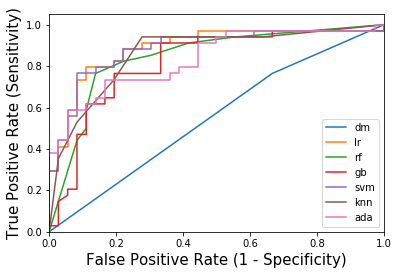

In [21]:
fpr_dm, tpr_dm, thresholds_dm = metrics.roc_curve(Y_train_class, data_ave_features['dm_cv_ave']['y_pred_prob'][:,1])
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(Y_train_class, data_ave_features['lr_cv_ave']['y_pred_prob'][:,1])
fpr_rf, tpr_rf, thresholds_rf = metrics.roc_curve(Y_train_class, data_ave_features['rf_cv_ave']['y_pred_prob'][:,1])
fpr_gb, tpr_gb, thresholds_gb = metrics.roc_curve(Y_train_class, data_ave_features['gb_cv_ave']['y_pred_prob'][:,1])
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(Y_train_class, data_ave_features['svm_cv_ave']['y_pred_prob'][:,1])
fpr_knn, tpr_knn, thresholds_knn = metrics.roc_curve(Y_train_class, data_ave_features['knn_cv_ave']['y_pred_prob'][:,1])
fpr_ab, tpr_ab, thresholds_ab = metrics.roc_curve(Y_train_class, data_ave_features['ab_cv_ave']['y_pred_prob'][:,1])

# plot model ROC curves
plt.plot(fpr_dm, tpr_dm, label="dm")
plt.plot(fpr_lr, tpr_lr, label="lr")
plt.plot(fpr_rf, tpr_rf, label="rf")
plt.plot(fpr_gb, tpr_gb, label="gb")
plt.plot(fpr_svm, tpr_svm, label="svm")
plt.plot(fpr_knn, tpr_knn, label="knn")
plt.plot(fpr_ab, tpr_ab, label="ada")

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize = 15)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize = 15)

Text(0,0.5,'Precision')

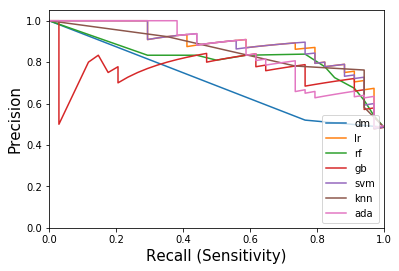

In [22]:
# calculate precision-recall curve
precision_dm, recall_dm, thresholds_pr_dm = metrics.precision_recall_curve(Y_train_class, data_ave_features['dm_cv_ave']['y_pred_prob'][:,1])
precision_lr, recall_lr, thresholds_pr_lr = metrics.precision_recall_curve(Y_train_class, data_ave_features['lr_cv_ave']['y_pred_prob'][:,1])
precision_rf, recall_rf, thresholds_pr_rf = metrics.precision_recall_curve(Y_train_class, data_ave_features['rf_cv_ave']['y_pred_prob'][:,1])
precision_gb, recall_gb, thresholds_pr_gb = metrics.precision_recall_curve(Y_train_class, data_ave_features['gb_cv_ave']['y_pred_prob'][:,1])
precision_svm, recall_svm, thresholds_pr_svm = metrics.precision_recall_curve(Y_train_class, data_ave_features['svm_cv_ave']['y_pred_prob'][:,1])
precision_knn, recall_knn, thresholds_pr_knn = metrics.precision_recall_curve(Y_train_class, data_ave_features['knn_cv_ave']['y_pred_prob'][:,1])
precision_ab, recall_ab, thresholds_pr_ab = metrics.precision_recall_curve(Y_train_class, data_ave_features['ab_cv_ave']['y_pred_prob'][:,1])

plt.plot(recall_dm, precision_dm, label='dm')
plt.plot(recall_lr, precision_lr, label='lr')
plt.plot(recall_rf, precision_rf, label='rf')
plt.plot(recall_gb, precision_gb, label='gb')
plt.plot(recall_svm, precision_svm, label='svm')
plt.plot(recall_knn, precision_knn, label='knn')
plt.plot(recall_ab, precision_ab, label='ada')

plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.legend(loc="lower right")
plt.xlabel('Recall (Sensitivity)', fontsize = 15)
plt.ylabel('Precision', fontsize = 15)

save final model using pickle

In [23]:
import pickle
#pickel model to save for later use
save_path = 'C:/Users/Schindler/Documents/Schindler_Lab/Data/Escalation/Ferguson/'

pkl_filename = str(save_path + "5day_ave_lr.pkl")  
with open(pkl_filename, 'wb') as file:  
    pickle.dump(lr_cv, file)

grid searches

In [ ]:
#scale data for grid search
train_scaled = scaler.fit_transform(X_train_full)

#grid search with cv for gb and full features
param_grid = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 4),
    "min_samples_leaf": np.linspace(0.1, 0.5, 4),
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt"],
    "criterion": ["friedman_mse",  "mae"],
    "subsample":[0.5, 0.8, 0.9, 1.0],
    "n_estimators":[10]
    }

scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

gb_base = GradientBoostingClassifier(random_state=39)

gb_gs = GridSearchCV(gb_base, param_grid, scoring='accuracy', cv=3, refit='f1')
gb_gs.fit(train_scaled, Y_train_class)

print("f1:"+str(np.average(cross_val_score(gb_gs, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(gb_gs, train_scaled, Y_train_class, scoring='roc_auc'))))

print(gb_gs.best_params_)

In [ ]:
#use best params
train_scaled = scaler.fit_transform(X_train_full)

gb_best = GradientBoostingClassifier(criterion='friedman_mse', learning_rate=0.1, loss='deviance', max_depth=3, max_features='log2', min_samples_leaf= 0.25, min_samples_split=0.1, n_estimators=10, subsample=0.8, random_state=39)
    
print("f1:"+str(np.average(cross_val_score(gb_best, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(gb_best, train_scaled, Y_train_class, scoring='roc_auc'))))
print("Accuracy:"+str(np.average(cross_val_score(gb_best, train_scaled, Y_train_class, scoring='accuracy'))))

gb_best.fit(train_scaled, Y_train_class)
print(gb_best.score(train_scaled, Y_train_class))

train_pred_gb = gb_best.predict(train_scaled)
train_pred_prob_gb = gb_best.predict_proba(train_scaled)
print(classification_report(Y_train_class, train_pred_gb))
print(confusion_matrix(Y_train_class, train_pred_gb))

In [ ]:
#scale data for grid search
train_scaled = scaler.fit_transform(X_train_ave)

#grid search with cv for svm and ave features
param_grid = {'C':(0.001, 0.01, 0.1, 1, 10), 'decision_function_shape':('ovo','ovr'), 'kernel':('linear', 'rbf')}
scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

svm_base = SVC(class_weight='balanced', random_state=39)

svm_gs = GridSearchCV(svm_base, param_grid, cv=3, scoring = scoring, refit='f1')
svm_gs.fit(train_scaled, Y_train_class)

print("f1:"+str(np.average(cross_val_score(svm_gs, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(svm_gs, train_scaled, Y_train_class, scoring='roc_auc'))))

print(svm_gs.best_params_)

In [ ]:
#use best params
train_scaled = scaler.fit_transform(X_train_ave)

svm_best = SVC(probability=True, kernel='linear', class_weight='balanced', C=1, decision_function_shape='ovo', random_state=39)
    
print("f1:"+str(np.average(cross_val_score(svm_best, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(svm_best, train_scaled, Y_train_class, scoring='roc_auc'))))
print("Accuracy:"+str(np.average(cross_val_score(svm_best, train_scaled, Y_train_class, scoring='accuracy'))))

svm_best.fit(train_scaled, Y_train_class)
print(svm_best.score(train_scaled, Y_train_class))

train_pred_svm = svm_best.predict(train_scaled)
train_pred_prob_svm = svm_best.predict_proba(train_scaled)
print(classification_report(Y_train_class, train_pred_svm))
print(confusion_matrix(Y_train_class, train_pred_svm))

In [ ]:
#grid search with cv for rf and ave features
train_scaled = scaler.fit_transform(X_train_ave)

param_grid = { 
    'n_estimators': [5, 10, 50, 100, 500],
    'max_features': [None, 'sqrt', 'log2'],
    'max_depth' : [3,4,5,6,7,None],
    'criterion' :['gini', 'entropy'],
    'bootstrap': [True, False]
}

scoring = ['accuracy', 'f1', 'precision', 'recall', 'roc_auc']

rf_base = RandomForestClassifier(class_weight='balanced', random_state=39)

rf_gs = GridSearchCV(rf_base, param_grid, cv=10, scoring = scoring, refit='f1')
rf_gs.fit(train_scaled, Y_train_class)

print("f1:"+str(np.average(cross_val_score(rf_gs, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(rf_gs, train_scaled, Y_train_class, scoring='roc_auc'))))

print(rf_gs.best_params_)

In [ ]:
#use best params
train_scaled = scaler.fit_transform(X_train_ave)

rf_best = RandomForestClassifier(class_weight='balanced', random_state=39)

print("f1:"+str(np.average(cross_val_score(rf_best, train_scaled, Y_train_class, scoring='f1'))))
print("ROC_AUC:"+str(np.average(cross_val_score(rf_best, train_scaled, Y_train_class, scoring='roc_auc'))))
print("Accuracy:"+str(np.average(cross_val_score(rf_best, train_scaled, Y_train_class, scoring='accuracy'))))

rf_best.fit(train_scaled, Y_train_class)
print(rf_best.score(train_scaled, Y_train_class))

train_pred_rf = rf_best.predict(train_scaled)
train_pred_prob_rf = rf_best.predict_proba(train_scaled)
print(classification_report(Y_train_class, train_pred_rf))
print(confusion_matrix(Y_train_class, train_pred_rf))

In [ ]:
#run on test data with best optimized model
#scale data
test_scaled = scaler.fit_transform(X_test_ave)

print('GB test AUC: {}'.format(lr_cv.score(test_scaled, Y_test_class)))
test_pred_gb = lr_cv.predict(test_scaled)
test_pred_prob_gb = lr_cv.predict_proba(test_scaled)
print(classification_report(Y_test_class, test_pred_gb))
print(confusion_matrix(Y_test_class, test_pred_gb))

### Unsupervised clustering

In [44]:
# center and scale the data
scaler = StandardScaler()

features_clust_scaled = scaler.fit_transform(data[features_ave])

Text(0,0.5,'Silhouette Coefficient')

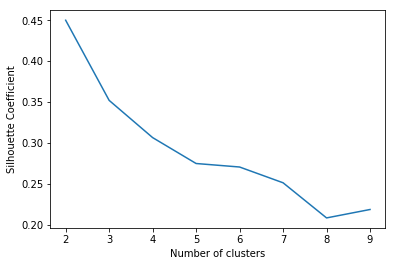

In [45]:
k_range = range(2,10)
scores = []
for k in k_range:
    km_ss = KMeans(n_clusters=k, random_state=1)
    km_ss.fit(features_clust_scaled)
    scores.append(silhouette_score(features_clust_scaled, km_ss.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')

In [46]:
km2 = KMeans(n_clusters=2,random_state=1234)
km2.fit(features_clust_scaled)
data['kmeans_2_scaled'] = [ "cluster_" + str(label) for label in km2.labels_ ]
data.groupby('kmeans_2_scaled').mean()

,Subject,Z-score,infusions_day1,infusions_day2,infusions_day3,infusions_day4,infusions_day5,loading_day1,loading_day2,loading_day3,loading_day4,loading_day5,taking_day1,taking_day2,taking_day3,taking_day4,taking_day5,seeking_day1,seeking_day2,seeking_day3,seeking_day4,seeking_day5,first_day1,first_day2,first_day3,first_day4,first_day5,latency_day1,latency_day2,latency_day3,latency_day4,latency_day5,interval_day1,interval_day2,interval_day3,interval_day4,interval_day5,class,infusions_ave,loading_ave,taking_ave,seeking_ave,first_ave,latency_ave,interval_ave
kmeans_2_scaled,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cluster_0,148.076923,-3.711106,2.384615,2.423077,3.076923,2.384615,4.538462,1.000000,1.076923,1.884615,0.846154,1.384615,1.346154,1.230769,1.384615,1.384615,2.115385,14.807692,7.115385,5.153846,10.500000,9.00,1633.814231,2080.857692,1752.512308,1533.007308,1412.126154,194.696128,206.340923,181.374551,160.276474,148.834878,189.188128,176.036237,173.959635,167.017115,127.521160,0.076923,2.961538,1.238462,1.492308,9.315385,1682.463538,178.304591,166.744455
cluster_1,138.533333,1.495547,6.146667,9.960000,16.466667,19.653333,22.880000,2.333333,3.373333,4.506667,5.053333,5.720000,2.986667,4.560000,6.360000,7.586667,8.253333,21.346667,30.453333,42.893333,54.106667,53.12,504.003333,207.812400,124.638000,47.407733,57.722533,115.377589,104.085597,93.368254,77.483846,67.428576,70.158734,31.722462,34.579815,25.513776,23.761045,0.626667,15.021333,4.197333,5.949333,40.384000,188.316800,91.548773,37.147167


In [47]:
data.groupby('Severity')['kmeans_2_scaled'].value_counts()

Severity  kmeans_2_scaled
high      cluster_1          47
          cluster_0           2
low       cluster_1          28
          cluster_0          24
Name: kmeans_2_scaled, dtype: int64